In [1]:
import pandas as pd      # import library
import seaborn as sns
from sklearn import tree
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('game data.csv') # read CSV file

In [3]:
df.head() # see CSV file

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [4]:
df = df.drop('Days', axis=1) # drop 'Days' column

In [5]:
df.head() # see CSV file

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [6]:
x = df.drop('Wear Jacket?', axis=1) # x = every column without 'Wear Jacket?' column 
y = df[['Wear Jacket?']] # y = 'Wear Jacket?'

In [7]:
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [8]:
y.head()

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes


In [9]:
from pandas.core.dtypes.common import is_numeric_dtype # import is_numeric_dtype module 

In [10]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder() # create LabelEncoder object

In [11]:
#using for loop for fit(training) and Transform
for i in x.columns:
    if is_numeric_dtype(x[i]):
        continue
    x[i]=le.fit_transform(x[i]) 

In [12]:
x.head() # x-axis with Encode

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [ ]:
# outlook(sunny, cloudy) = (1, 0)
# temprature(cold, warm) = (0, 1)
# routine(indoor, outdoor) = (0, 1)

In [13]:
df.head() 

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [26]:
#using for loop for fit(training) and Transform
for i in y.columns:
    if is_numeric_dtype(y[i]):
        continue
    y[i]=le.fit_transform(y[i]) 

In [27]:
y.head()

,Wear Jacket?
0,0
1,1
2,0
3,1
4,1


In [ ]:
# Wear Jacker? (Yes, No) --> (1, 0)

In [14]:
from sklearn.tree import DecisionTreeClassifier #import decision tree module from scikit learn

In [15]:
dt = DecisionTreeClassifier() # create Decision Tree Classifier object

In [16]:
dt.fit(x,y) # training decison tree model

DecisionTreeClassifier()

In [17]:
x.Temprature.unique()
#unique() function finds the unique elements of an array and returns these unique elements as a sorted array

array([0, 1])

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

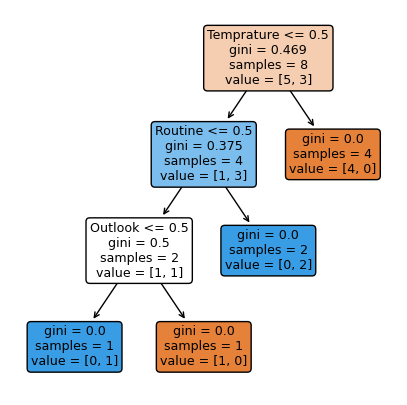

In [25]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5)) # figure size (width,height)
tree.plot_tree(dt, filled=True, rounded=True, feature_names=x.columns) # show the Decision Tree

In [19]:
dt.predict([[1,0,0]]) # predict (sunny, cold, indoor) = (1, 0, 0)

array(['No'], dtype=object)

In [ ]:
# Wear Jacket? ('No' = 0)